In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
colors = plt.cm.tab10.colors
import os


In [3]:
Strut = np.array([
                    [-2.074/2, 0.0],
                    [ 2.074/2, 0.0],
]) #Coordinates of molecular nitrogen

In [4]:
conv = np.loadtxt('../Examples/Casida/static/convergence')

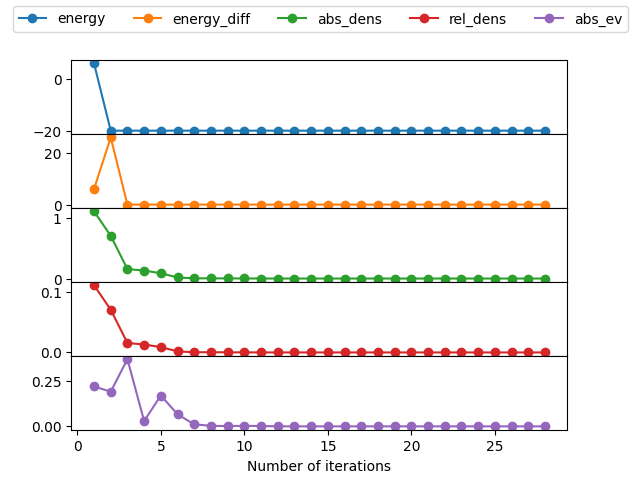

In [21]:
fig,axs = plt.subplots(5,1, sharex=True)
fig.subplots_adjust(hspace=0)
labels = ['energy','energy_diff','abs_dens','rel_dens','abs_ev','rel_ev']
for i in range(5):
    axs[i].plot(conv[:,0], conv[:,i+1], 'o-', label = labels[i], color = colors[i])
    axs[i].set_xlabel('Number of iterations')
fig.legend(ncol = 5)


In [ ]:
data = []
with open('../Examples/Casida/static/eigenvalues', 'r') as file:
    lines = [line.rstrip('\n') for line in file]
for line in lines:
    if len(line.split("--")) == 2:
        data.append([
                        line.split("--")[1].split("       ")[0],
                        float(line.split("--")[1].split("       ")[1].split("000000")[0]),
                        ])
data = np.array(data, dtype = np.float64)

Text(0, 0.5, 'Eigenvalues (Ha)')

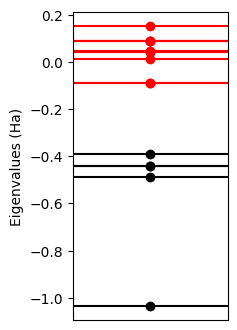

In [85]:
fig,ax = plt.subplots()
fig.set_size_inches(2,4)
for i, datum in enumerate(data):
    if int(datum[1]) == 2:
        ax.scatter(0, datum[0], color = 'k')
        ax.hlines(datum[0], -1, 1, color = 'k')
    else:
        ax.scatter(0, datum[0], color = 'r')
        ax.hlines(datum[0], -1, 1, color = 'r')
ax.set_xlim(-1,1)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel('Eigenvalues (Ha)')

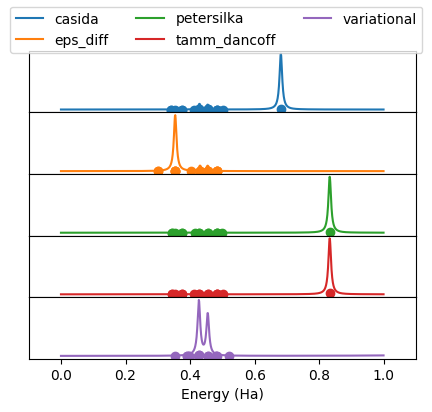

In [120]:
spectrum_data = {}
excite_data = {}

directory = "../Examples/Casida/casida/"
for filename in os.listdir(directory):
    if filename.startswith("spectrum"):
        key = filename.split(".")[1]
        spectrum_data[key] = np.loadtxt(os.path.join(directory, filename))
        excite_data[key] = np.loadtxt(os.path.join(directory, key), skiprows=1)
    

fig,ax = plt.subplots(nrows=len(spectrum_data), ncols=1, sharex=True)
fig.subplots_adjust(hspace=0)
fig.set_size_inches(5,4)
for i, key in enumerate(spectrum_data):
    ax[i].plot(spectrum_data[key][:,0], spectrum_data[key][:,-1], label = key, color = colors[i])
    ax[i].scatter(excite_data[key][:,-5], excite_data[key][:,-1], color = colors[i])
    ax[i].set_xlabel('Energy (Ha)')
    ax[i].set_yticks([])
    ax[i].set_xlim(-0.1,1.1)
fig.legend(ncol = 3, loc = 'upper center')

In [123]:
trans_max = np.loadtxt('../Examples/Casida/casida/casida_excitations/00015')
print(trans_max)

[[ 3.00000000e+00  6.00000000e+00  1.00000000e+00  7.04837753e-01]
 [ 4.00000000e+00  6.00000000e+00  1.00000000e+00 -5.66016046e-02]
 [ 5.00000000e+00  6.00000000e+00  1.00000000e+00  9.54029799e-15]
 [ 3.00000000e+00  7.00000000e+00  1.00000000e+00 -5.66016046e-02]
 [ 4.00000000e+00  7.00000000e+00  1.00000000e+00 -7.04837753e-01]
 [ 5.00000000e+00  7.00000000e+00  1.00000000e+00 -1.67553070e-14]
 [ 3.00000000e+00  8.00000000e+00  1.00000000e+00  1.29048072e-15]
 [ 4.00000000e+00  8.00000000e+00  1.00000000e+00 -1.83719886e-15]
 [ 5.00000000e+00  8.00000000e+00  1.00000000e+00 -6.28472359e-12]
 [ 3.00000000e+00  9.00000000e+00  1.00000000e+00  1.43434423e-12]
 [ 4.00000000e+00  9.00000000e+00  1.00000000e+00  1.16739888e-12]
 [ 5.00000000e+00  9.00000000e+00  1.00000000e+00 -4.40754691e-16]
 [ 3.00000000e+00  1.00000000e+01  1.00000000e+00  1.16867423e-12]
 [ 4.00000000e+00  1.00000000e+01  1.00000000e+00 -1.43456319e-12]
 [ 5.00000000e+00  1.00000000e+01  1.00000000e+00  1.66053933e

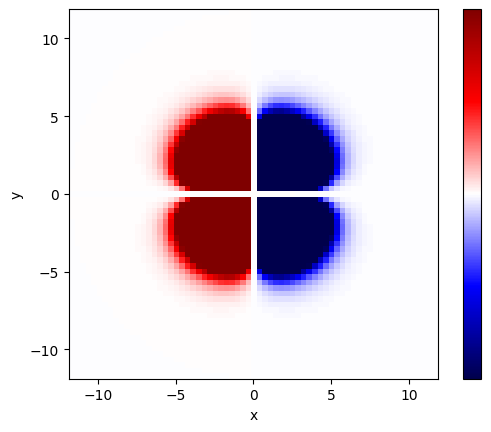

In [141]:
file = '../Examples/Casida/casida/casida_rho_n04.z=0'

def planes(file,):

    d0 = np.loadtxt(file)
    x = y = sorted(set(d0[:,0]))
    Map = np.zeros((len(x),len(y)))
    for i,item in enumerate(d0):
        try:
            Map[x.index(item[0]), y.index(item[1])] = item[2]
        except Exception as e:
            print("Exception %s raised while handling index %i.\n" %(e,i))
    
    plt.imshow(Map.transpose(), cmap='seismic', extent=[min(x), max(x), min(y), max(y)])
    cbar = plt.colorbar()
    plt.clim(-10E-6,10E-6)  
    cbar.set_ticks([])
    plt.xlabel('x')
    plt.ylabel('y')
planes(file)